/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


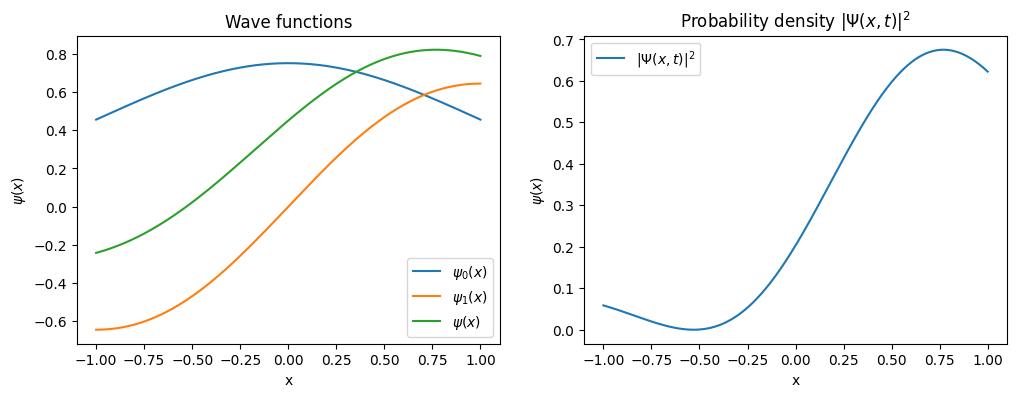

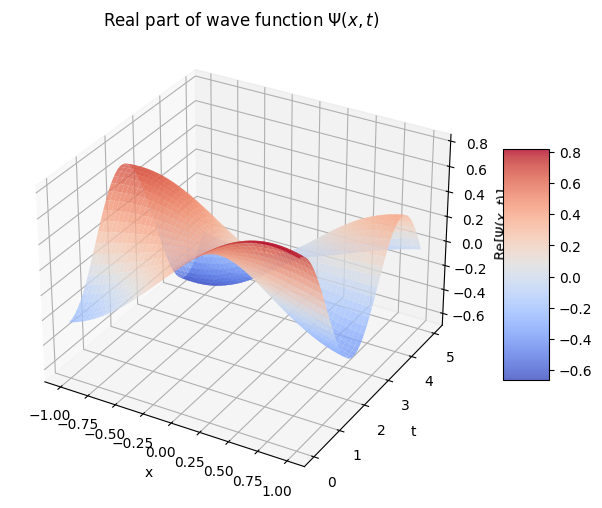

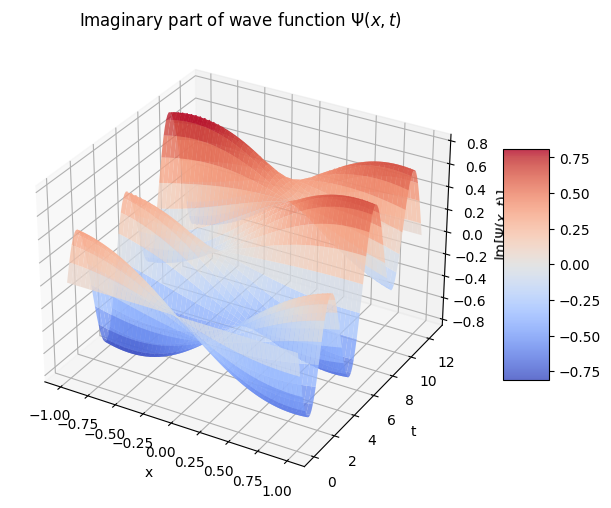

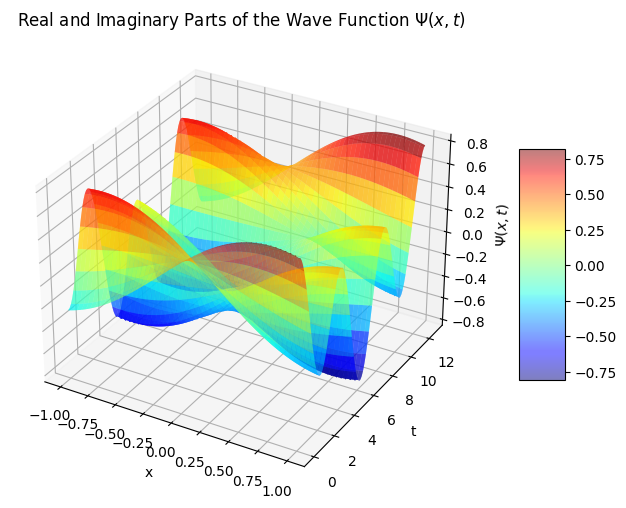

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from mpl_toolkits.mplot3d import Axes3D


m = 1
omega = 1
h_bar = 1


def psi_0(x):
    return ((m*omega) / (h_bar*np.pi)) ** 0.25 * np.exp(((-m * omega * x ** 2)/h_bar) / 2)

def psi_1(x):
    return (m*omega / (h_bar*np.pi)) ** 0.25 * np.sqrt(2 * m * omega / h_bar) * x *  np.exp(((-m * omega * x ** 2)/h_bar) / 2)

def psi_2(x, t):
    return (1 / 25) * ((9 * (psi_0(x) ** 2)) + (12 * psi_0(x) * psi_1(x) * (2 * np.cos(omega * t)) + (16 * (psi_1(x) ** 2))))

def psi(x, t):
    return ((3 * (np.exp(-1j * omega * t / 2)) * psi_0(x)) + (4 * np.exp(-3j * omega * t / 2) * psi_1(x))) / 5


x_min, x_max = -1, 1
x = np.linspace(x_min, x_max, 500)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(x, psi_0(x), label=r'$\psi_0(x)$')
ax1.plot(x, psi_1(x), label=r'$\psi_1(x)$')
ax1.plot(x, psi(x,t=0), label=r'$\psi(x)$')
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel(r'$\psi(x)$')
ax1.set_title('Wave functions')


ax2.plot(x, psi_2(x, t=0), label=r'$|\Psi(x,t)|^2$')
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel(r'$\psi(x)$')
ax2.set_title('Probability density $|\Psi(x,t)|^2$')


# Plot 3D real part of psi(x,t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
X, T = np.meshgrid(x, np.linspace(0, 5, 100))
Z = psi(X, T).real
surf = ax.plot_surface(X, T, Z, cmap='coolwarm', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$\mathrm{Re}[\Psi(x,t)]$')
ax.set_title('Real part of wave function $\Psi(x,t)$')
fig.colorbar(surf, shrink=0.5, aspect=5)


# Plot 3D imaginary part of psi(x,t)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

t_min, t_max = 0, 4*np.pi
t = np.linspace(t_min, t_max, 100)

X, T = np.meshgrid(x, t)
Y = psi(X, T).imag

surf = ax.plot_surface(X, T, Y, cmap='coolwarm', alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$\mathrm{Im}[\Psi(x,t)]$')
ax.set_title(r'Imaginary part of wave function $\Psi(x,t)$')
             
# Create 3D plot of the real and imaginary parts of the wave function that vary with time
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Define colors for the surface
norm = plt.Normalize(psi(x, 0).real.min(), psi(x, 0).real.max())
colors = plt.cm.jet(norm(psi(x, 0).real))

# Create the surface plot for the real part of psi
surf_real = ax.plot_surface(X, T, psi(X, T).real, cmap=plt.cm.jet, alpha=0.5)


# Define colors for the surface
norm = plt.Normalize(psi(x, 0).imag.min(), psi(x, 0).imag.max())
colors = plt.cm.jet(norm(psi(x, 0).imag))

# Create the surface plot for the imaginary part of psi
surf_real = ax.plot_surface(X, T, psi(X, T).real, cmap=plt.cm.jet, alpha=0.5)

# Add colorbar for the surfaces
fig.colorbar(surf_real, shrink=0.5, aspect=5)

# Set axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel(r'$\Psi(x,t)$')
ax.set_title('Real and Imaginary Parts of the Wave Function $\Psi(x,t)$')

# Show the plots
plt.show()
